# How to improve your business using data science ?

You want to improve your home sales business by providing an easy to use house price estimation to your clients ? Here you will see how to do it using machine learning models.

This notebook is an introduction to python programming and data science. It contains three parts:
1. Explore your data
1. Build your first model
1. Improve it

## Import packages
Programming features are available throught **packages** which have to be **imported** to be used in program. In this notebook you will use the most popular python packages for **data manipulation**, **data visualization** and **machine learning**.

In [3]:
# data manipulation
import pandas

# data visualization
import matplotlib.pyplot as plt
import seaborn

In [4]:
# configuration, don't pay attention
%matplotlib inline
plt.rcParams["figure.figsize"]=20, 10

import warnings
warnings.filterwarnings('ignore')


## Import your data

In [5]:
data = pandas.read_csv('input/train.csv')

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
target = data['SalePrice']

In [8]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

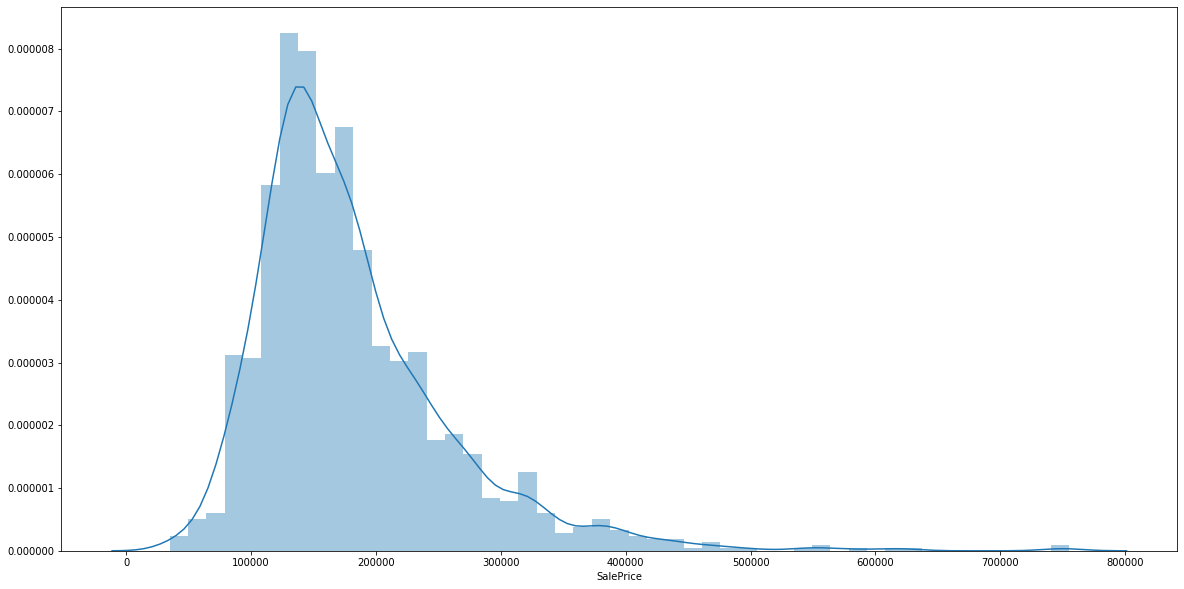

In [9]:
seaborn.distplot(target)

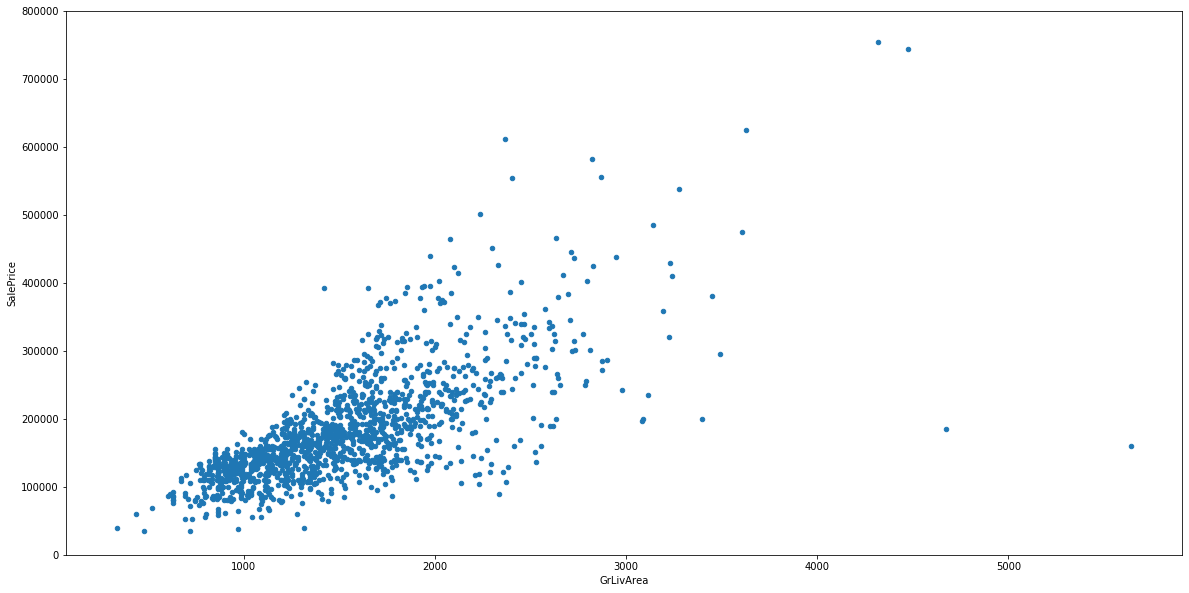

In [10]:
#scatter plot grlivarea/saleprice
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

## Bivariate analysis

### The art of data visualization 

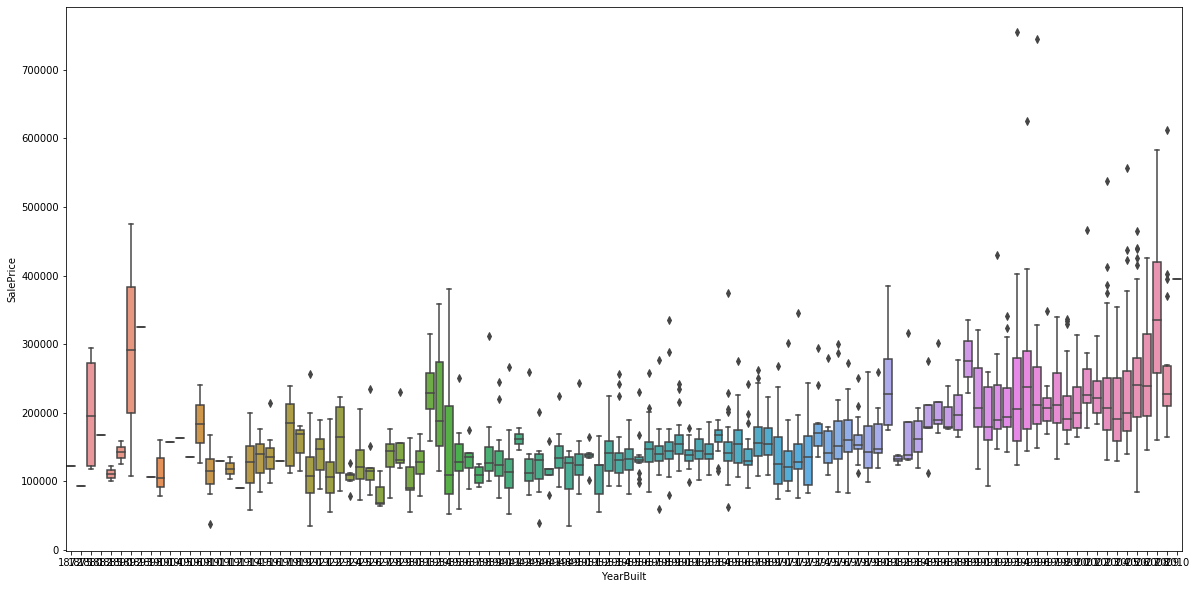

In [11]:
seaborn.boxplot(x='YearBuilt', y="SalePrice", data=data)

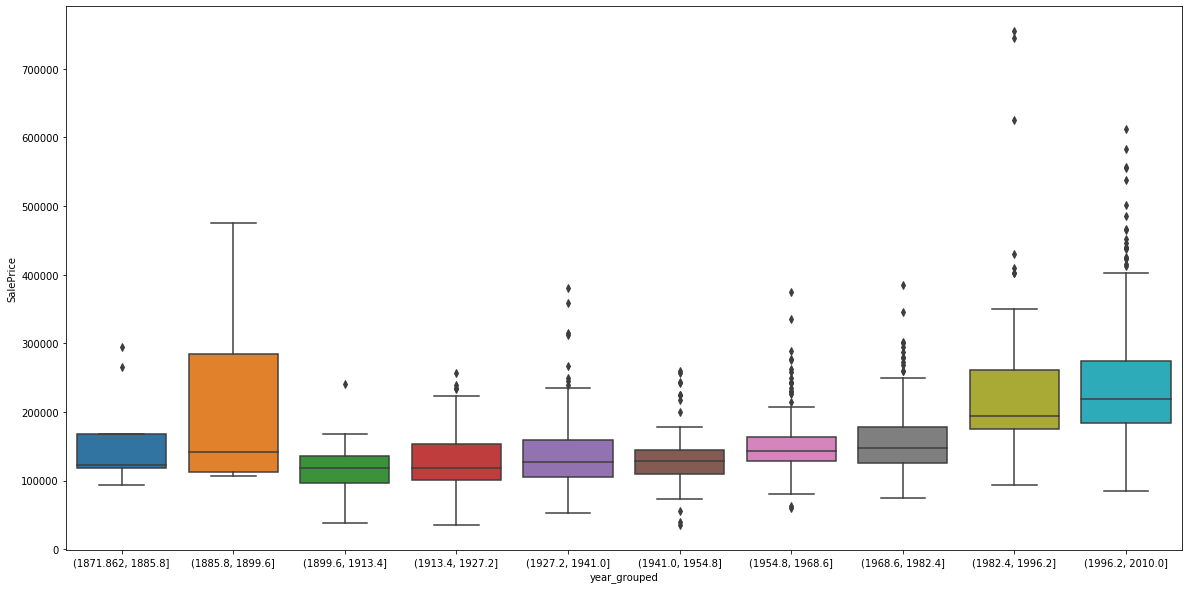

In [12]:
data['year_grouped'] = pandas.cut(data['YearBuilt'], 10)
seaborn.boxplot(x='year_grouped', y="SalePrice", data=data)

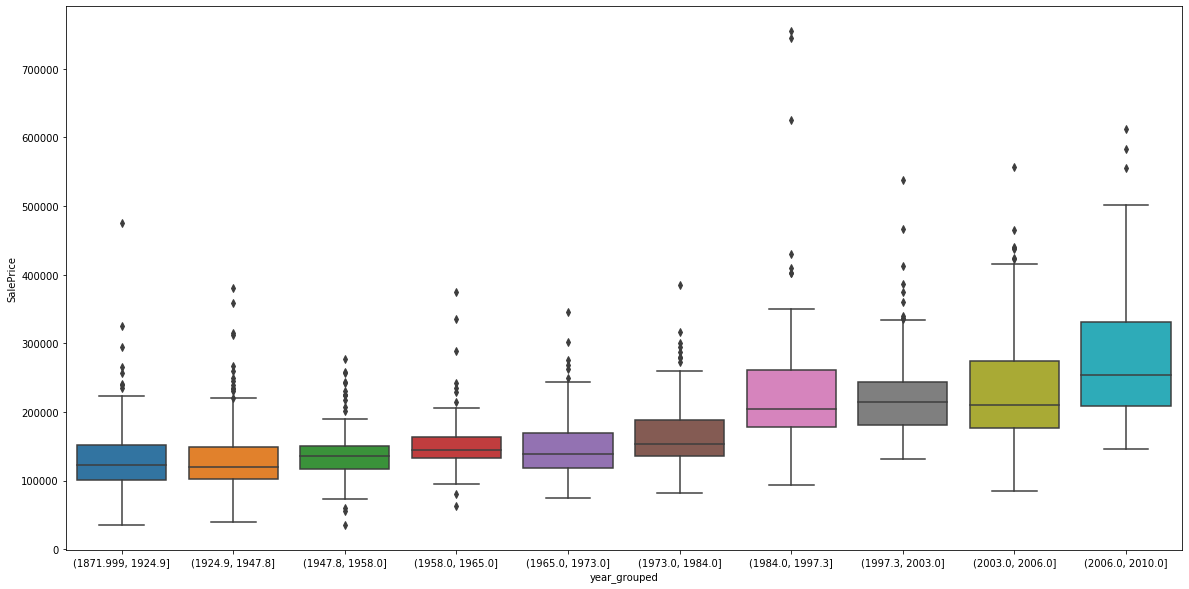

In [13]:
data['year_grouped'] = pandas.qcut(data['YearBuilt'], 10)
seaborn.boxplot(x='year_grouped', y="SalePrice", data=data)

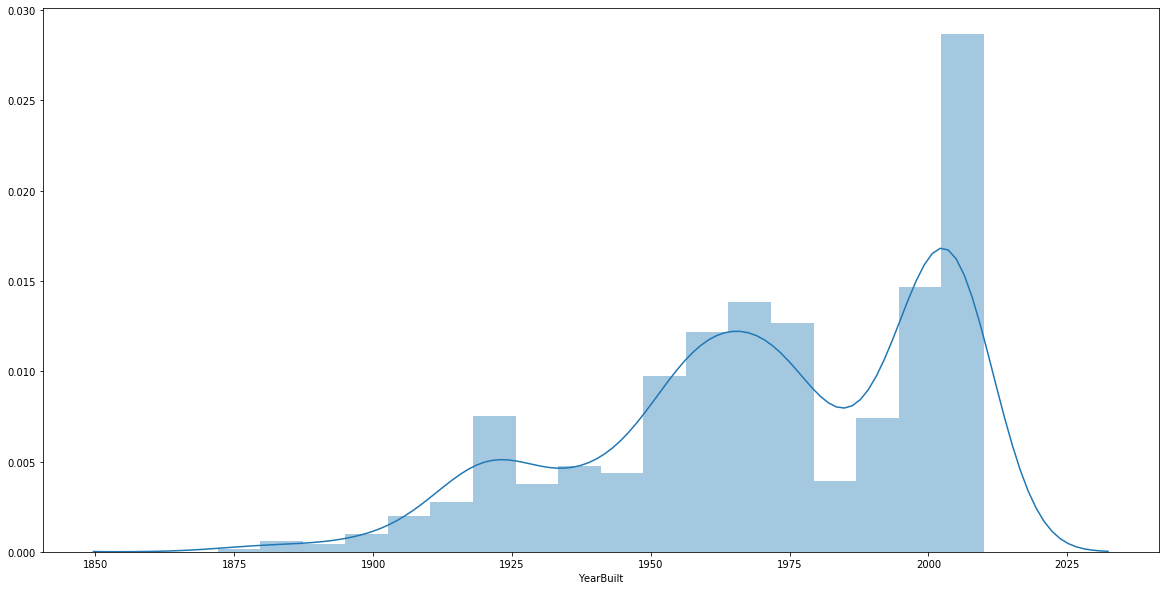

In [14]:
seaborn.distplot(data['YearBuilt'])

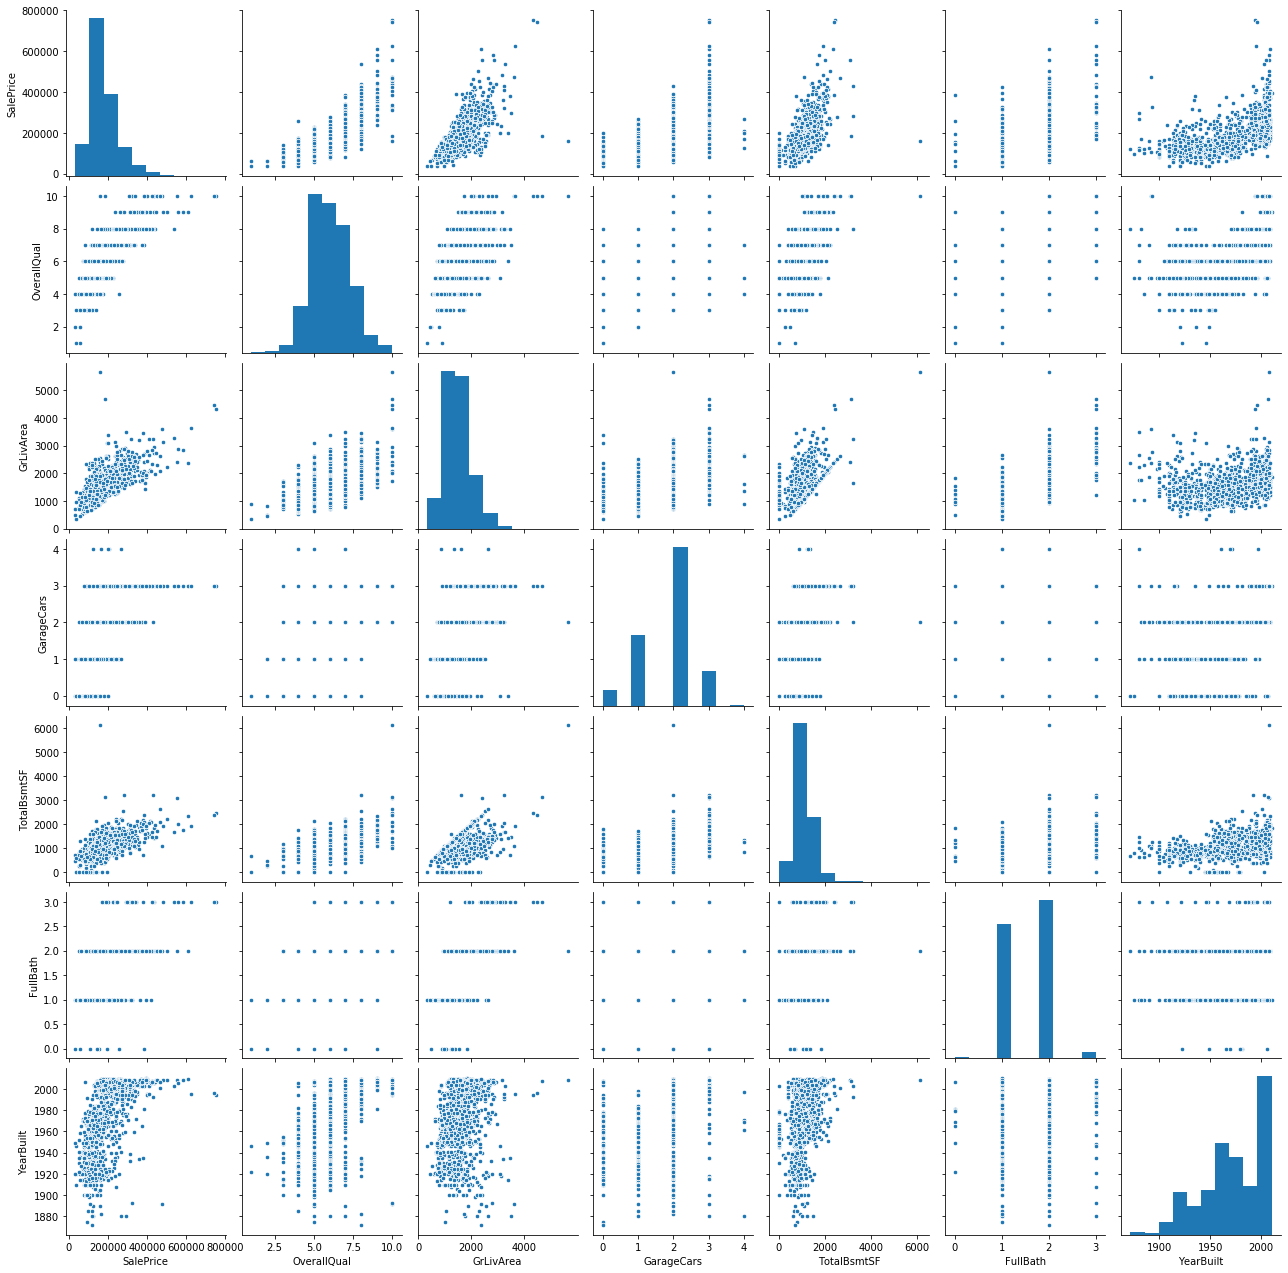

In [15]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
seaborn.pairplot(data[cols], size = 2.5, plot_kws=dict(s=20))


## Building your first model

In [16]:
from  sklearn.linear_model import LinearRegression

In [17]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

In [18]:
features_data = data[features]
target_data = data[target]

In [19]:
my_first_model = LinearRegression()
my_first_model.fit(features_data, target_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Congratulations ! You just trained your first machine learning model !
<br>
Let's use it !

### You now have a perfectly valid house price estimation service, let's try it !

In [20]:
from collections import OrderedDict

In [21]:
# Fill with your house data
my_house = pandas.DataFrame([OrderedDict({'OverallQual': 7, 
                                         'GrLivArea': 150, 
                                         'GarageCars': 2, 
                                         'TotalBsmtSF': 200, 
                                         'FullBath': 1, 
                                         'YearBuilt': 1880})])

In [22]:
# compute your price estimation using your first mode
my_price_estimation = my_first_model.predict(my_house)
print(f'The price estimation of your house is: {my_price_estimation[0] :.2f} $')

The price estimation of your house is: 76348.07 $


To understand in details the impact of each feature in the model you can have a look on its coefficients by executing the next code snippet:

In [23]:
for feature, coef in zip(features, my_first_model.coef_):
    print(f'{feature}: {coef: .2f}')

OverallQual:  20519.97
GrLivArea:  54.08
GarageCars:  14646.32
TotalBsmtSF:  29.18
FullBath: -5503.97
YearBuilt:  336.55


## Our model is functionnal, that's cool. But perhaps we can improve it ?

### Step 1: To improve a model, you need to measure it's quality:

In [24]:
my_first_model.score(features_data, target_data) 
#score : pour valider la précision du model par rapport à la donnée fournie en entrée

0.7686473354220851

<br><br><br><br><br><br><br><br><br>

### STOP !!!

You must never ever assess the quality of your model using your trainning data ! You would be unable to identify a terrible aspect of machine learning: **overfitting** !
<br>
You are now welcome to ask your gentle instructor to explain what overfitting is.

To avoid falling into the trap of overfitting, you must use 'unseen data' to assess the quality of your model, we will call them 'validation data' or 'test data'. There are differencies between those two notions but it is beyond the scope of this introduction.

The simplest way of building a validation set is to split your training data in 2 parts containing, for instance, 70% of data for trainning and 30% for validation. It is quite simple to achieve using the scikit learn package.

### Step 1: split you data between a train set and a validation set

In [25]:
from sklearn.model_selection import train_test_split
features_train, features_validation, target_train, target_validation = train_test_split(features_data, target_data, random_state=4321)


In [47]:
print('Features_train size: :', features_train.shape[0]) #matrice train 1095 lignes, et 6 features choisi précedemment
print('Target_train size: :', target_train.shape[0])
print('Features_validation size: :', features_validation.shape[0]) #matrice de validation de 365 lignes
print('Target_validation size: :', target_validation.shape[0])

Features_train size: : 1092
Target_train size: : 1092
Features_validation size: : 365
Target_validation size: : 365


### Step 2: retrain our model on the newly created train set

In [40]:
#todo: rename features_train, target_train
benchmark_model = LinearRegression()
benchmark_model.fit(features_train, target_train) #on refait un entrainement avec la matrice train
#on garde des lignes dans la matrice de validation pour pouvoir tester et valider, on n'utilise pas toutes les données pour l'entrainement.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 3: assess your model quality on the validation set

In [28]:
benchmark_model.score(features_validation, target_validation)

0.8017929647443444

## How to improve my model ?

You have a lot of possibilities here, let's explore two of them: 
* Clean your data
* Add more features

### Clean your data by removing outliers

An **outlier** is a point which is not like the others. He's different, and in data science ... life's hard: he may have to quit the training set.

The good news is: there are a lot of ways to identify outliers, and nothing is written in advance. Let's have a look by producing a few dataviz.

In [29]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

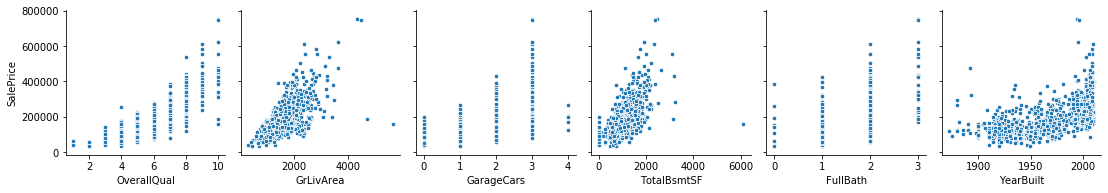

In [30]:
seaborn.pairplot(data, x_vars=features, y_vars=target, size = 2.5, plot_kws={'s': 20})

Here we can decide that outliers have a GrLivArea over 4000 and remove those points.

In [43]:
points_to_drop = features_train.index[features_train['GrLivArea'] >= 4000] 
#nombre de points qu'on va laisser tomber, on en voit 4 au lieu de 3 car il y en a suremet 1 qui appartient au training test et l'autre dans le test
print('Number of points to drop in trainning dataset: ', len(points_to_drop))
features_train = features_train.drop(points_to_drop)
target_train = target_train.drop(points_to_drop)

Number of points to drop in trainning dataset:  0


In [44]:
no_outliers_model = LinearRegression()
no_outliers_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
no_outliers_model.score(features_validation, target_validation) #on relance le score et on a un meilleur score 83% en retirant les outliers
#aucun modele peut etre à 100% car il y a des incertitudes, et c'est pr ça qu'on utilise de smodeles probabilistiques. 
#Le but est d'avoir une asymptote vers 100%. Il faut avoir une target sur qqchose à améliorer. 
#Un expert humain peut avoir une capacité d'estimation à 60-80% 
#le systeme automatique c'est d'être aussi bien ou mieux qu'un expert humain.
#on dev la maintenance prédictive d'une centrale électrique, pour dire qd est ce qu'un élément de cette centrale va tomber en panne. 
#on calcule alors cmt l'équipement se comporte dans une utilisation normale. 

0.8399592705725024

We improved our model by 1.3 points !

### Add new variables

Another way to improve your models is called **feature engineering**. This is basically the art of find more information, most of the time by combining existing features in a specific way. Here we will do a less technical feature engineering: getting more information about your existing data !

In [50]:
original_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
added_features = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'GarageType', 'SaleCondition']
#rajouter des colonnes = feature engineering

In [51]:
new_data = data[original_features + added_features]

In [52]:
new_data = pandas.get_dummies(new_data, columns=added_features, drop_first=True)

In [53]:
from sklearn.model_selection import train_test_split
features_train, features_validation, target_train, target_validation = train_test_split(new_data, target_data, random_state=4321)

In [54]:
better_model = LinearRegression()
better_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
better_model.score(features_validation, target_validation)

0.8232283541293876

Congratulation ! Another 1 point improvement !

## Conclusion

So, you can now say that you've just been threw a full data science workflow:
* Data exploration
* Data Cleaning
* Feature engineering
* Modeling
* Iterate over the four previous steps



Don't forget that :<br>
* Without data no model could have been built <br>
* With garbage data no model could have been built<br>
* With semi-garbage (real life) data, you should expect to improve a lot your models just by cleaning them<br>
* **With clean data, you have a chance of building a nice model which helps your business and create a ton of value for your users !**


In [57]:
for feature, coef in zip(original_features + added_features, better_model.coef_):
    print(f'{feature}: {coef: .2f}')

OverallQual:  15058.63
GrLivArea:  42.58
GarageCars:  16044.19
TotalBsmtSF:  19.93
FullBath: -560.25
YearBuilt:  146.39
MSZoning:  35023.71
LotShape:  34997.40
LotConfig:  34715.39
Neighborhood:  18807.77
GarageType:  15964.32
SaleCondition: -24817.78
